In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def reader(n):
    df = pd.read_csv("expenses.csv")

    try:
        refill_index = df[df["Date"] == "Refill" ].index[-n]
        df = df.loc[refill_index + 1 :]
    except:
        pass
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(int)
    df["Not Me"] = df["Not Me"].astype(int)
    return df

df = reader(1)
df

,Date,Amount,Item,Category,Split,Not Me
71,2024-05-03,135,vegetables,utility,1,0
72,2024-05-03,250,petrol,travel,1,0
73,2024-05-04,40,maggie,food,2,0
74,2024-05-04,300,petrol,travel,2,0
75,2024-05-05,110,dosa,utility,1,0
76,2024-05-05,130,vegetables,utility,1,0
77,2024-05-05,150,recharge,utility,1,0
78,2024-05-06,80,honey-chilli,food,2,0
79,2024-05-06,60,ocean,food,2,0
80,2024-05-06,336,food,food,2,0


## total spend

In [2]:
def total_spent(df):
    return df["Amount"].sum()

a = total_spent(df)
a

3420

# top spends

In [6]:
df.sort_values(by="Amount", ascending=False)

,Date,Amount,Item,Category,Split,Not Me
85,2024-05-09,913,grocery,utility,1,0
80,2024-05-06,336,food,food,2,0
74,2024-05-04,300,petrol,travel,2,0
72,2024-05-03,250,petrol,travel,1,0
89,2024-05-11,200,petrol,travel,1,0
90,2024-05-12,160,breakfast,utility,1,0
84,2024-05-09,150,haircut,utility,1,0
77,2024-05-05,150,recharge,utility,1,0
81,2024-05-07,147,vegetables,utility,1,0
71,2024-05-03,135,vegetables,utility,1,0


## categorical

In [ ]:
def categorical(df):
    d = df[["Category", "Amount", "Split", "Not Me"]]
    d = d.drop(d[d["Not Me"] == 1].index)
    d["Amount"] = d["Amount"] / d["Split"]
    d.drop(["Split", "Not Me"], axis=1, inplace=True)
    d = d.groupby("Category").sum()
    return d

d = categorical(df)
d

,Amount
Category,
food,258.0
travel,600.0
utility,2154.0


## plot

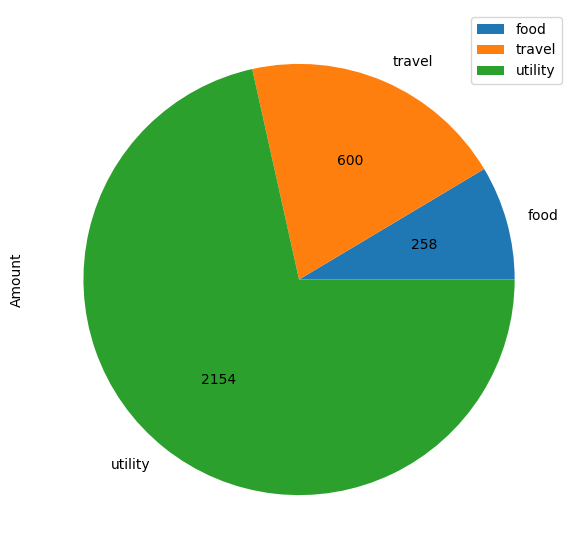

In [ ]:
def absolute_value(val):
    return int(round(val / 100.0 * d["Amount"].sum()))

plt.figure(figsize=(7, 7))
d["Amount"].plot(kind="pie", autopct=absolute_value, legend=True)
plt.show()

## date wise

In [ ]:
d = df[["Date", "Amount"]].groupby("Date").sum()
d

,Amount
Date,
2024-05-03,385
2024-05-04,340
2024-05-05,390
2024-05-06,476
2024-05-07,147
2024-05-08,132
2024-05-09,1090
2024-05-10,50
2024-05-11,250


## plot


<Axes: xlabel='Date'>

<Figure size 900x900 with 0 Axes>

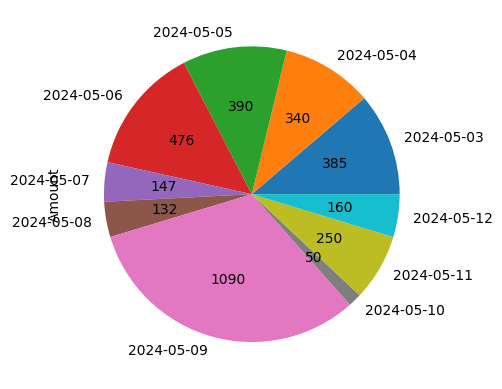

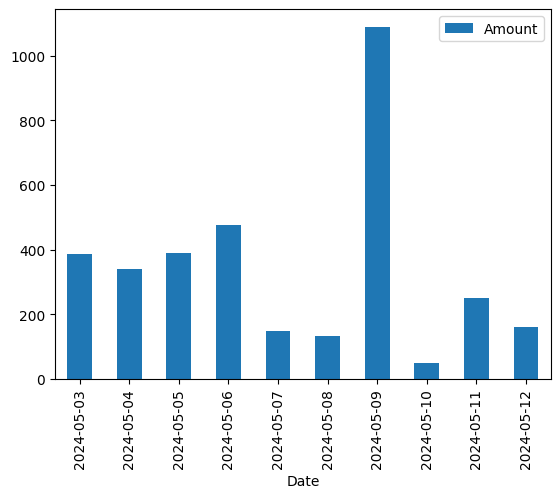

In [ ]:
plt.figure(figsize=(9, 9))
d.plot(kind="pie", y="Amount", autopct=absolute_value, legend=False)
d.plot(kind="bar")


## owed

In [ ]:
d = df[["Amount", "Split", "Not Me"]]
s = d[d["Not Me"] == 1]
d = d.drop(s.index)
sum1 = s["Amount"].sum()
sum2 = (d["Amount"] - (d["Amount"] / d["Split"])).sum()
print(sum1 + sum2)

408.0


## No of refills ago

In [ ]:
def no_of_refills_ago(n):
    df = pd.read_csv("expenses.csv")
    refill_index = df[df["Date"] == "Refill"].index[-(n)]
    try:
        refill_index2 = df[df["Date"] == "Refill"].index[-(n + 1)]
    except:
        refill_index2 = 0
    df = df.loc[refill_index2 + 1: refill_index - 1]
    df["Amount"] = df["Amount"].astype(int)
    df["Split"] = df["Split"].astype(float)
    df["Not Me"] = df["Not Me"].astype(int)
    return categorical(df)

e = no_of_refills_ago(1)
e

,Amount
Category,
food,10.0
travel,300.0
utility,1556.0


## common items

In [ ]:
import pandas as pd
def most_common_item():
    df = pd.read_csv("expenses.csv")
    a = df["Item"].value_counts()
    print(a)
most_common_item()

Item
vegetables      11
petrol           6
milk             5
ocean            4
fruitchill       4
honey-chilli     4
tea              4
maggie           3
breakfast        3
juice            3
haircut          2
brindavan        2
curd             2
fruitpop         2
recharge         2
oreo             2
refill           2
mogu-mogu        2
flowers          2
Gatorade         1
gonemad          1
paneer           1
shake            1
entry            1
ice-cream        1
pen              1
ration           1
dosa             1
food             1
vegetable        1
sabeena          1
frappe           1
tamarind         1
oreo-shake       1
rasna            1
brownie          1
m                1
chocolate        1
auto             1
cake             1
advance          1
pasta            1
vada             1
stationery       1
grocery          1
Name: count, dtype: int64
